# Otto Group Product Classification Challenge

## 背景介绍
奥托集团是世界上最大的电子商务公司之一，在20多个国家设有子公司。该公司每天都在世界各地销售数百万种产品,所以对其产品根据性能合理的分类非常重要。

不过,在实际工作中,工作人员发现,产品存在大量的五分类。本案例要求,你对奥拓集团的产品进行正确的分分类。尽可能的提供分类的准确性。

链接：https://www.kaggle.com/c/otto-group-product-classification-challenge/overview


## 数据集介绍

- 本案例中，数据集包含大约200,000种产品的93个特征。
- 其目的是建立一个能够区分otto公司主要产品类别的预测模型。
- 所有产品共被分成九个类别（例如时装，电子产品等）。

## 评分标准

![avatar](../source/103.jpg) 

- i表示样本，j表示类别。$p_{ij}$代表第i个样本属于类别j的概率
- 如果第i个样本真的属于类别j，则$y_{ij}$等于1，否则为0。
- 根据上公式，假如你将所有的测试样本都正确分类，所有$p_{ij}$都是1，那每个log($p_{ij}$)都是0，最终的logloss也是0。
- 假如第1个样本本来是属于1类别的，但是你给它的类别概率$p_{ij}$=0.1，那logloss就会累加上log(0.1)这一项。我们知道这一项是负数，而且$p_{ij}$越小，负得越多，如果$p_{ij}$=0，将是无穷。这会导致这种情况：你分错了一个，logloss就是无穷。这当然不合理，为了避免这一情况，我们对非常小的值做如下处理：$max(min(p, 1-10^{-15}),10^{-15})$
- 也就是说最小不会小于$10^{-15}$

- 实际上,上述损失函数如果是对于二分类问题,就可以简化为:
![avatar](../source/104.jpg) 

## 流程分析

- 获取数据
- 数据基本处理
    - 数据量比较大，尝试是否可以进行数据分割
    - 转换目标值表示方式
- 模型训练
- 模型基本训练


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/otto/train.csv")
data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


(61878, 95)

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


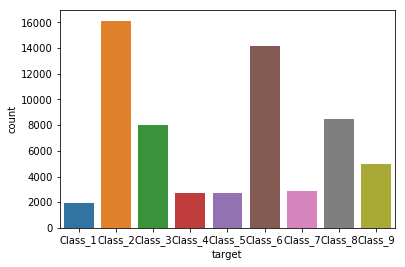

由上图可以看出,该数据类别不均衡,所以需要后期处理

## 数据基本处理
数据已经经过脱敏,不再需要特殊处理

### 截取部分数据

(10000, 95)

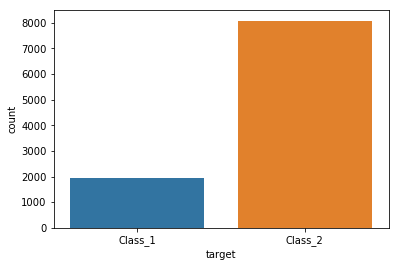

显然,我们直接截取的数据只有 2 个类别,所以这种截取方式不可取

### 随机欠采样

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,6,1,5,0,0,1,...,22,0,1,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


((61878, 93), (61878,))

((17361, 93), (17361,))

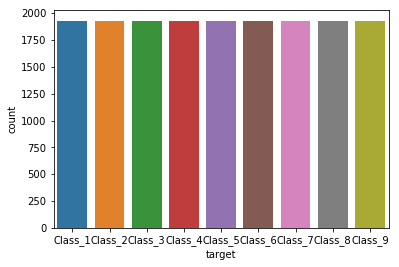

### 把标签值转换为数字

0    Class_1
1    Class_1
2    Class_1
3    Class_1
4    Class_1
Name: target, dtype: object

array([0, 0, 0, ..., 8, 8, 8])

### 分割数据

((13888, 93), (13888,))

((3473, 93), (3473,))

## 模型训练
### 基本模型训练

RandomForestClassifier(oob_score=True)

array([4, 6, 8, ..., 2, 1, 2])

0.7644687589979845

0.762456797235023

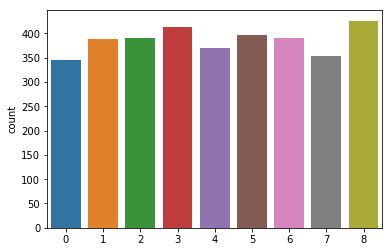

ValueError: y_true and y_pred contain different number of classes 9, 2. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [0 1 2 3 4 5 6 7 8]

上面报错原因:logloss使用过程中,必须要求将输出用one-hot表示,

需要将这个多类别问题的输出结果通过OneHotEncoder修改为如下:

array([[4],
       [2],
       [8],
       ...,
       [2],
       [1],
       [2]])

array([[4],
       [6],
       [8],
       ...,
       [2],
       [1],
       [2]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

8.134960866984443

array([[0.05, 0.02, 0.  , ..., 0.  , 0.01, 0.  ],
       [0.02, 0.1 , 0.21, ..., 0.41, 0.04, 0.  ],
       [0.35, 0.  , 0.  , ..., 0.04, 0.11, 0.5 ],
       ...,
       [0.  , 0.1 , 0.85, ..., 0.05, 0.  , 0.  ],
       [0.01, 0.56, 0.03, ..., 0.  , 0.  , 0.  ],
       [0.01, 0.18, 0.26, ..., 0.21, 0.  , 0.08]])

0.7636943870058348

## 模型调优
n_estimators, max_feature, max_depth, min_samples_leaf

确定最优的n_estimators

[1.14858907 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[1.14858907 1.13983688 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[1.14858907 1.13983688 1.14546227 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[1.14858907 1.13983688 1.14546227 1.14378861 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[1.14858907 1.13983688 1.14546227 1.14378861 1.1420968  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[1.14858907 1.13983688 1.14546227 1.14378861 1.142

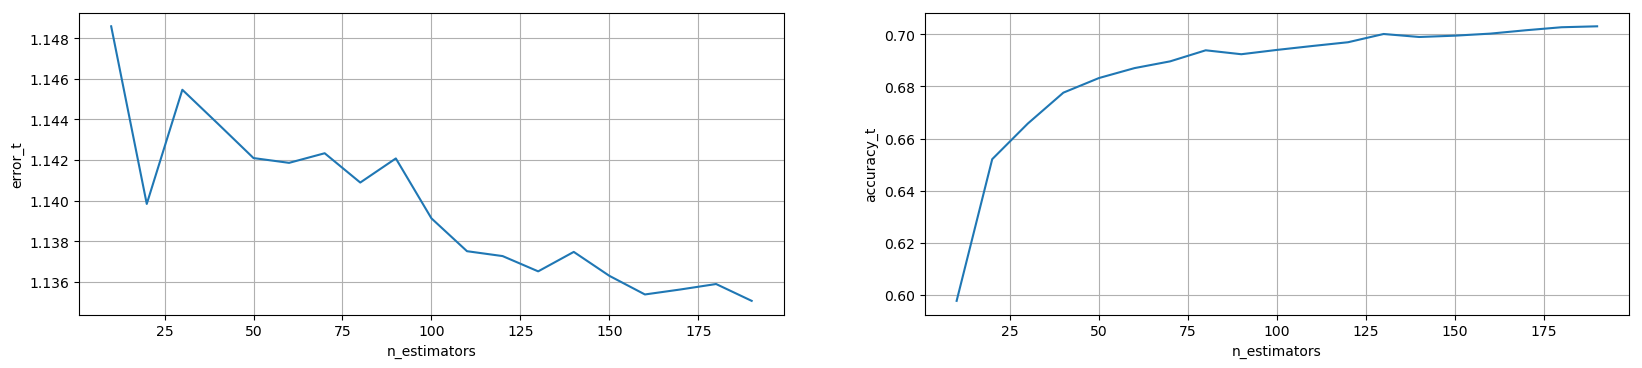

经过图像展示,最后确定n_estimators=175的时候,表现效果不错

## 确定最优的max_features¶

[1.22545567 0.         0.         0.         0.         0.
 0.        ]
[1.22545567 1.13614679 0.         0.         0.         0.
 0.        ]
[1.22545567 1.13614679 1.09814684 0.         0.         0.
 0.        ]
[1.22545567 1.13614679 1.09814684 1.07894133 0.         0.
 0.        ]
[1.22545567 1.13614679 1.09814684 1.07894133 1.07573696 0.
 0.        ]
[1.22545567 1.13614679 1.09814684 1.07894133 1.07573696 1.07437339
 0.        ]
[1.22545567 1.13614679 1.09814684 1.07894133 1.07573696 1.07437339
 1.07439718]


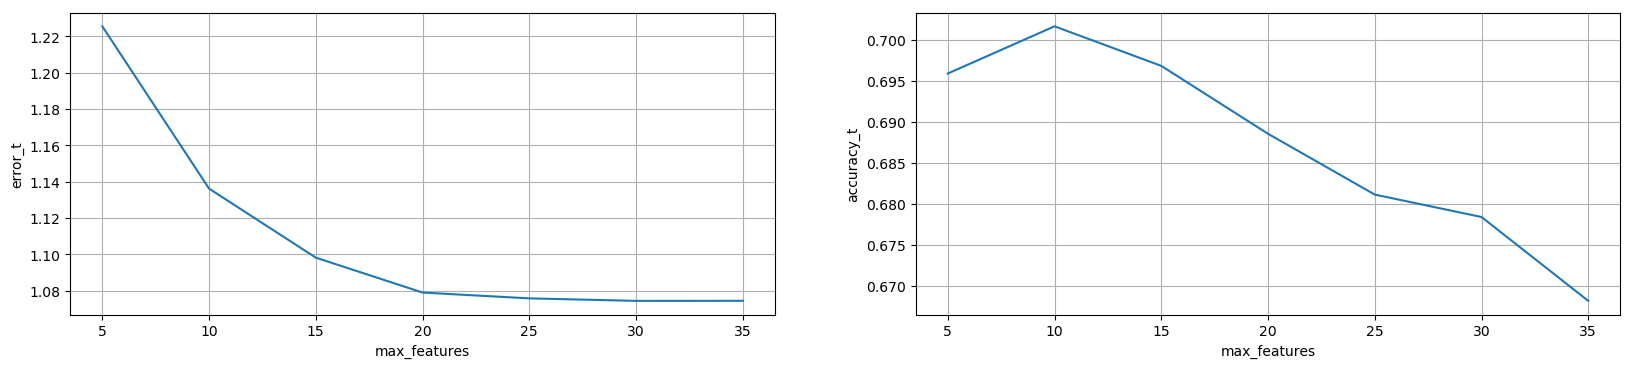

经过图像展示,最后确定max_features=15的时候,表现效果不错

## 确定最优的max_depth¶

[1.09814684 0.         0.         0.         0.         0.
 0.         0.         0.        ]
[1.09814684 0.87520256 0.         0.         0.         0.
 0.         0.         0.        ]
[1.09814684 0.87520256 0.85482361 0.         0.         0.
 0.         0.         0.        ]
[1.09814684 0.87520256 0.85482361 0.85349407 0.         0.
 0.         0.         0.        ]
[1.09814684 0.87520256 0.85482361 0.85349407 0.85349124 0.
 0.         0.         0.        ]
[1.09814684 0.87520256 0.85482361 0.85349407 0.85349124 0.85349124
 0.         0.         0.        ]
[1.09814684 0.87520256 0.85482361 0.85349407 0.85349124 0.85349124
 0.85349124 0.         0.        ]
[1.09814684 0.87520256 0.85482361 0.85349407 0.85349124 0.85349124
 0.85349124 0.85349124 0.        ]
[1.09814684 0.87520256 0.85482361 0.85349407 0.85349124 0.85349124
 0.85349124 0.85349124 0.85349124]


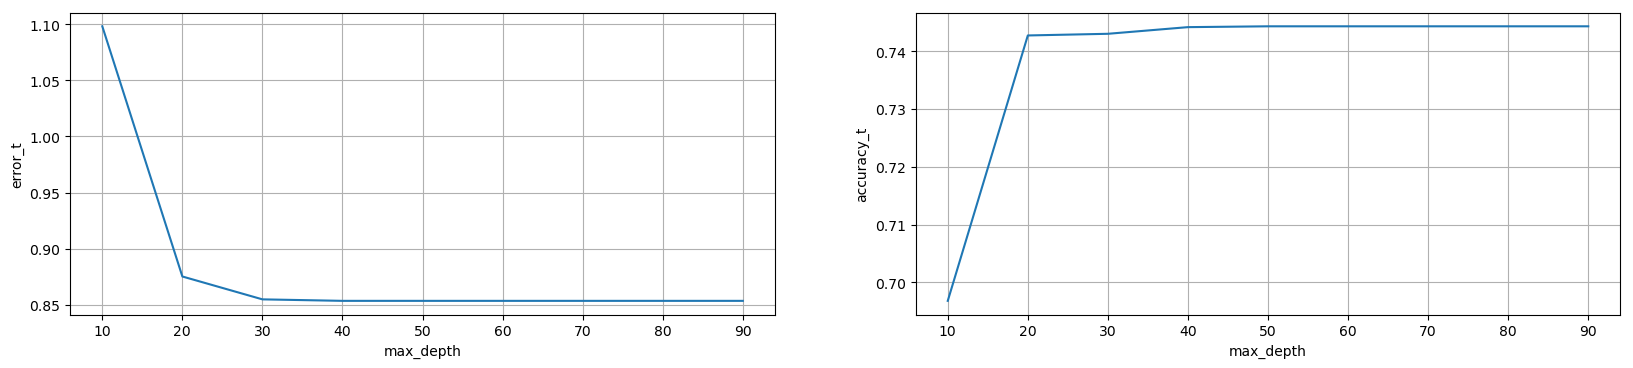

经过图像展示,最后确定max_depth=30的时候,表现效果不错

## 确定最优的min_sample_leaf

[0.73550382 0.         0.         0.         0.        ]
[0.73550382 0.7640414  0.         0.         0.        ]
[0.73550382 0.7640414  0.79822346 0.         0.        ]
[0.73550382 0.7640414  0.79822346 0.82169857 0.        ]
[0.73550382 0.7640414  0.79822346 0.82169857 0.84231552]


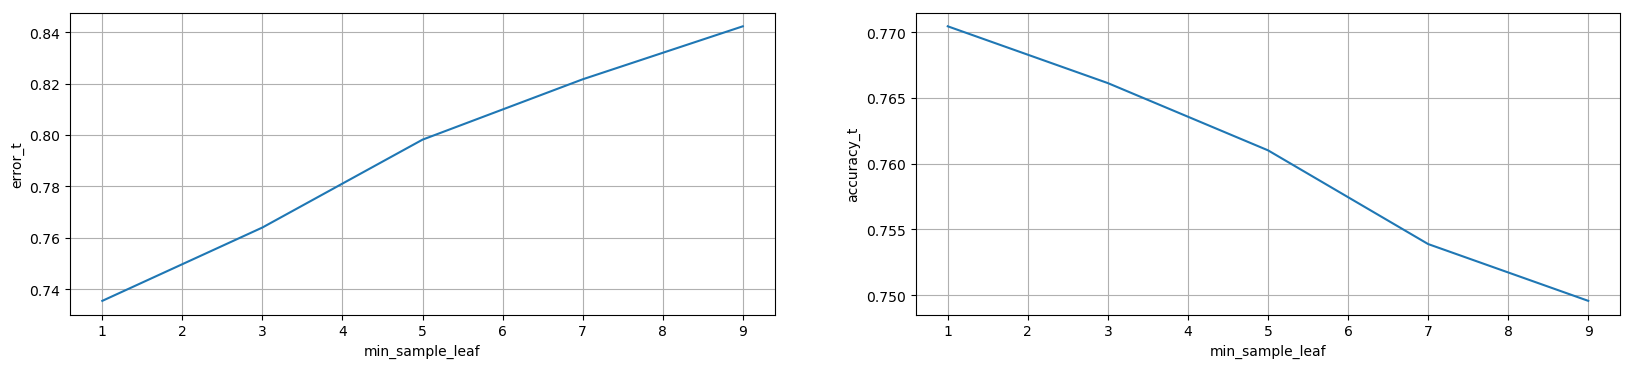

经过图像展示,最后确定min_sample_leaf=1的时候,表现效果不错

### 确定最优模型
n_estimators=175,

max_depth=30,

max_features=15,

min_samples_leaf=1,

RandomForestClassifier(max_depth=30, max_features=15, n_estimators=175,
                       n_jobs=-1, oob_score=True, random_state=40)

0.7615894039735099

0.7691532258064516

0.7271046940250512

### 生成提交数据

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,0,0,0,0,0,0,0,3,...,0,0,11,1,20,0,0,0,0,0
1,2,2,14,16,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,0,1,12,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,2,0,3,...,0,0,0,0,0,0,0,9,0,0


array([[0.02285714, 0.06448781, 0.13853282, ..., 0.05151139, 0.00571429,
        0.00571429],
       [0.03428571, 0.08      , 0.01904762, ..., 0.03428571, 0.29714286,
        0.04571429],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00571429,
        0.        ],
       ...,
       [0.01142857, 0.31931429, 0.31474286, ..., 0.02857143, 0.00571429,
        0.00571429],
       [0.01142857, 0.28750053, 0.13069849, ..., 0.01152461, 0.        ,
        0.        ],
       [0.00667177, 0.15775206, 0.37852678, ..., 0.16273888, 0.00571429,
        0.00656536]])

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,0.022857,0.064488,0.138533,0.694039,0.000000,0.017143,0.051511,0.005714,0.005714
1,0.034286,0.080000,0.019048,0.060952,0.005714,0.422857,0.034286,0.297143,0.045714
2,0.000000,0.000000,0.000000,0.005714,0.000000,0.988571,0.000000,0.005714,0.000000
3,0.023143,0.256182,0.316408,0.234367,0.000000,0.000286,0.026757,0.000000,0.142857
4,0.257414,0.000382,0.000186,0.000249,0.000860,0.006008,0.034846,0.229385,0.470670


,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,0.022857,0.064488,0.138533,0.694039,0.000000,0.017143,0.051511,0.005714,0.005714
1,2,0.034286,0.080000,0.019048,0.060952,0.005714,0.422857,0.034286,0.297143,0.045714
2,3,0.000000,0.000000,0.000000,0.005714,0.000000,0.988571,0.000000,0.005714,0.000000
3,4,0.023143,0.256182,0.316408,0.234367,0.000000,0.000286,0.026757,0.000000,0.142857
4,5,0.257414,0.000382,0.000186,0.000249,0.000860,0.006008,0.034846,0.229385,0.470670
